<a href="https://colab.research.google.com/github/mohamedamr13/Machine-Learning-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 

In [37]:
df = pd.read_csv('CC GENERAL.csv')
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001.0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002.0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003.0,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004.0,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,10005.0,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [38]:
df['MINIMUM_PAYMENTS'].fillna( df['MINIMUM_PAYMENTS'].mean() , inplace = True )
df['CREDIT_LIMIT'].fillna( df['CREDIT_LIMIT'].mean() , inplace = True )

df['CUST_ID'].describe()

count       8950
unique      8950
top       C18198
freq           1
Name: CUST_ID, dtype: object

In [39]:
# Removing the 'C' from the CUST_ID for the model to analyze remaining number 

'C100'[1:]

remove_initial = lambda string : string[1:]
df['CUST_ID'] = df['CUST_ID'].apply( remove_initial )
df['CUST_ID'] = df['CUST_ID'].apply( lambda x : float(x) )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   float64
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric



In [6]:
hirarchial =pd.DataFrame(clust_labels)
hirarchial


,0
0,2
1,2
2,2
3,2
4,2
...,...
8945,2
8946,2
8947,2
8948,2


Plotting Dendogram

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Credit Cards Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

Error in callback <function flush_figures at 0x7f3d719bf050> (for post_execute):


KeyboardInterrupt: ignored

In [7]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [8]:
labels=pd.DataFrame(kmeans.labels_)
labels


,0
0,0
1,2
2,0
3,0
4,0
...,...
8945,1
8946,1
8947,1
8948,1


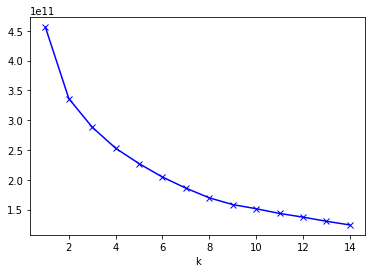

In [11]:
sum = [] 
R = range(1,15)
for k in R:
  kmeansTemp=KMeans(n_clusters=k)  
  kmeansTemp.fit(df)
  sum.append(kmeansTemp.inertia_)
sum

plt.plot( R , sum , 'bx-')
plt.xlabel('k')
plt.show()


In [41]:
df.reindex()
kmeans2=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans2.fit(df)
labels2=pd.DataFrame(kmeans2.labels_)
labels2

,0
0,1
1,0
2,0
3,0
4,1
...,...
8945,1
8946,1
8947,1
8948,1


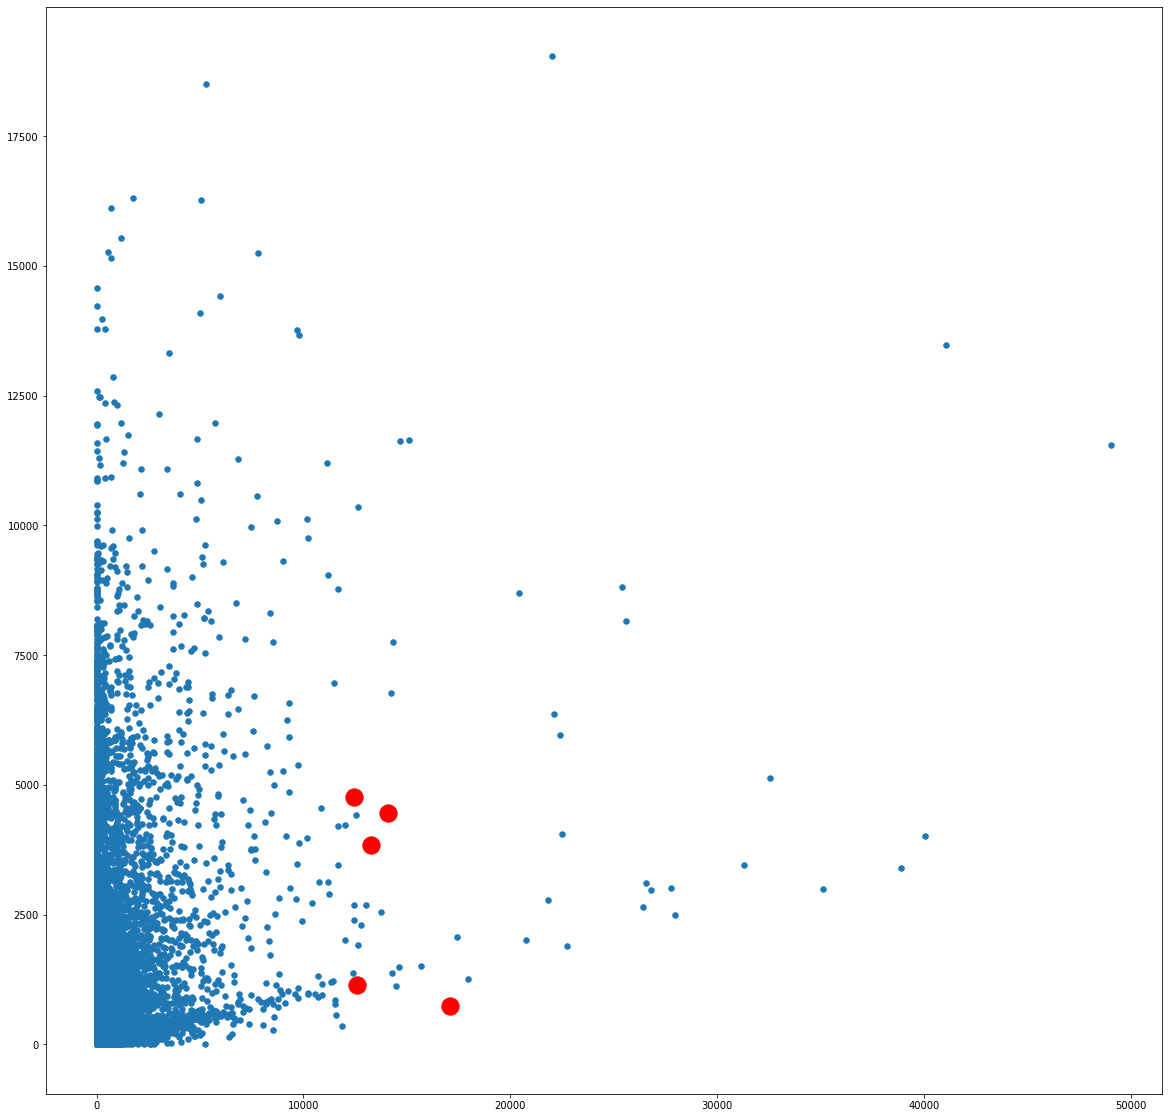

In [40]:
plt.figure(figsize=(20,20))
plt.scatter(df['PURCHASES'] , df['BALANCE'] , s = 30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')


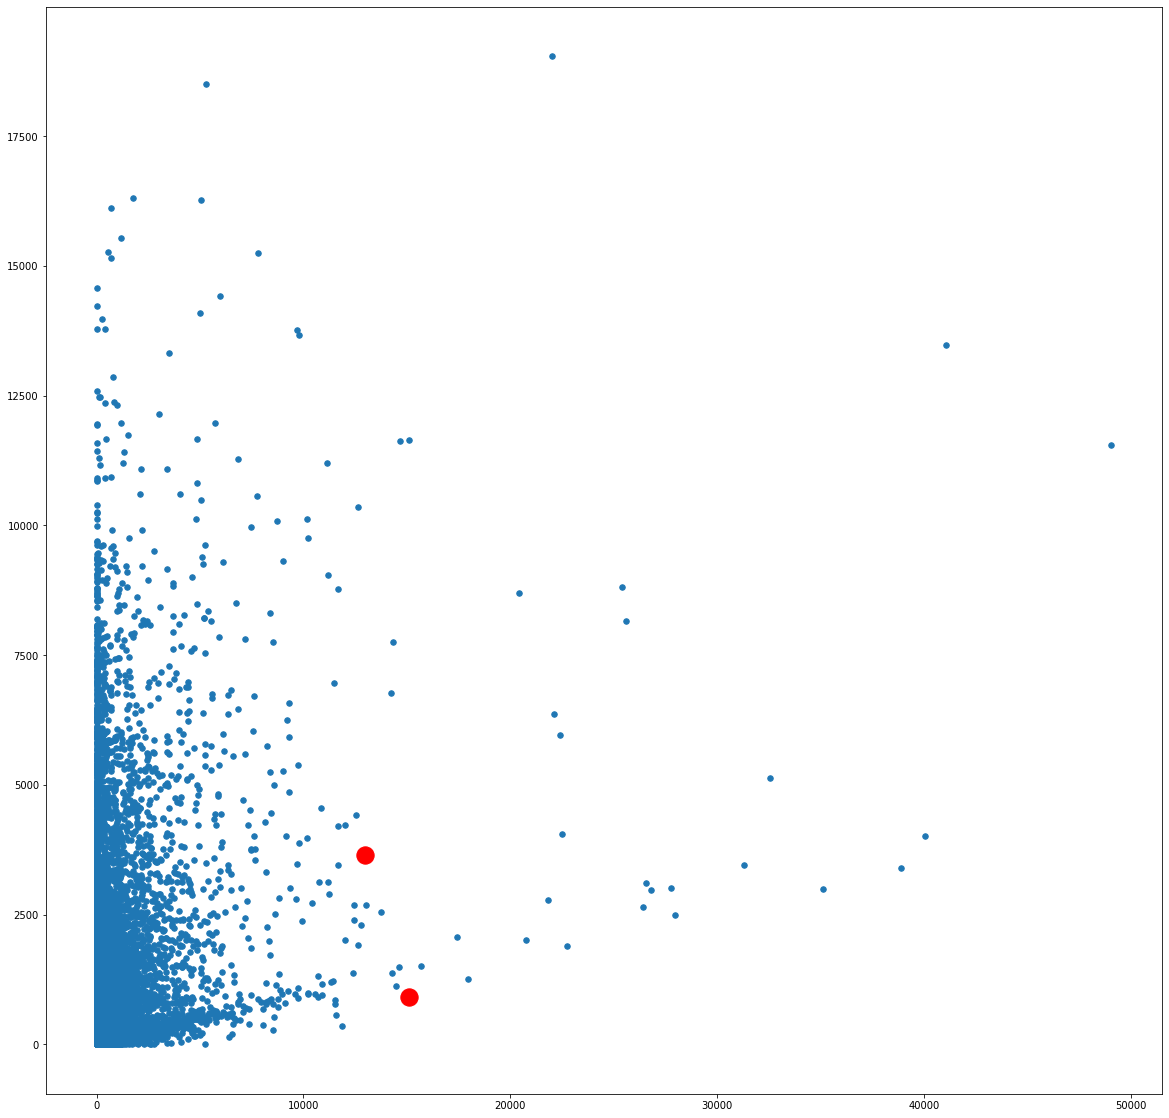

In [42]:
plt.figure(figsize=(20,20))
plt.scatter(df['PURCHASES'] , df['BALANCE'] , s = 30)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
